Text(0, 0.5, 'y')

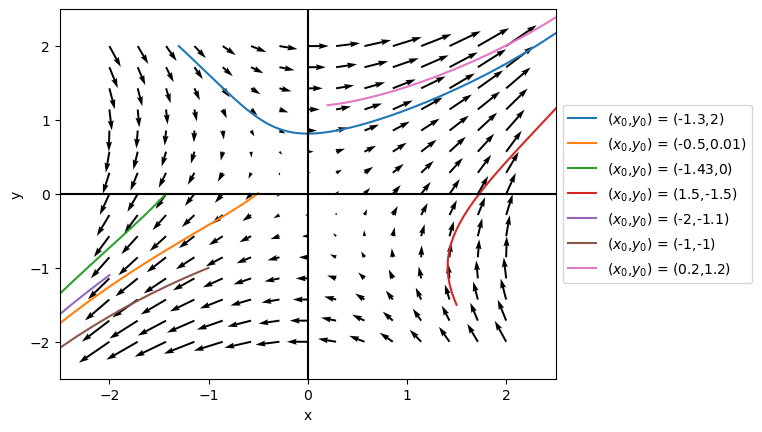

In [24]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def diffeq(t,val):
  x,y = val
    #return [y + np.sin(x), x]
  return [y + np.sin(x), x]
    #[x + np.exp(-y), (-y)]

#xiv, yiv = [-0.43,-2,2,2], [2,-2,-2,2]
xiv, yiv = [-1.3,-0.5,-1.43,1.5,-2,-1,0.2], [2,.01,0,-1.5,-1.1,-1,1.2]

for i in range(7):
    sol = solve_ivp(diffeq, 
                    t_span = [-np.pi, np.pi],
                    y0=[xiv[i],yiv[i]],
                    t_eval=np.linspace(-np.pi,np.pi,100))
    plt.plot(sol.y[0,:], sol.y[1,:],label='($x_0$,$y_0$) = ('+str(xiv[i])+','+str(yiv[i])+')')
    #plt.plot(sol.t, sol.y[0],'-')
    #plt.plot(sol.t, sol.y[1],'-')

x = np.linspace(-2, 2, 15) #creating an array for x
y = np.linspace(-2, 2, 15) #creating an array for y

X, Y = np.meshgrid(x, y) #creating a meshgrid over the x-y phase space

DX, DY = diffeq(0, [X, Y]) #assigning the xdot andnydot value at each grid point

# This normalizes the arrows so they are all of unit length and just show the direction
N = np.sqrt(DX**2 + DY**2)
N[N==0] = 1 # eliminate /0 errors, it is sort of optional.
#DX /= N
#DY /= N

plt.quiver(X, Y, DX, DY) #plots the unit vector arrows at eac grid point
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0,0],[-5,5],'k')
plt.plot([-5,5],[0,0],'k')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('x')
plt.ylabel('y')